# description

Import Data: Importing dataset.

Set Up Stopwords: Get a list of common words to ignore.

Convert text to lowercase, tokenize into words, and remove stopwords.

Word Frequency: Count how often each word appears in the data.

Word Cloud: Create a word cloud to visualize frequent words.

TF-IDF: Calculate how important each word is by combining frequency and uniqueness.

TF-IDF Word Cloud: Make a word cloud with the most significant words.

Keyword Analysis: Track specific keywords over time and visualize with a heatmap.

# TFIDF

In [1]:
## importing dataset

import pandas as pd 

df = pd.read_csv(r"C:\Users\Mouni\Downloads\file.csv")

df.head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [2]:
# Splitting the 'Release_Date' column into 'Month' and 'Year'
df[['Released_Month', 'Released_Year']] = df['Release_Date'].str.split(', ', expand=True)

# Displaying the updated DataFrame
print(df.head())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

# Get the stopwords

In [3]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'won', 'as', 'whom', 'such', 'its', 'that', 'yourselves', 'hadn', 'will', 'shouldn', 'mustn', 'don', 'which', 'being', 'than', 'shan', 'does', 'did', "needn't", 'was', 'is', 'below', 'they', 'mightn', 'herself', 'been', 'am', 'him', 'between', "wasn't", 'nor', 'haven', 'o', 'these', 'ain', 'm', "you'll", 'a', 'then', 'those', 'didn', 'll', 'ourselves', 'has', 'himself', "she's", 'from', 'about', 'but', 'having', 'during', 'doing', 'you', "that'll", "hadn't", "won't", 'any', 'her', 'their', 'your', 'yourself', "shan't", 'where', 're', "wouldn't", "don't", 'not', 'more', 'had', 'ma', 've', 'itself', 'doesn', 'on', 'because', "didn't", 'hasn', "isn't", 'most', "it's", 'while', 'we', "you'd", 'further', 'do', 'same', 'this', 'to', 'under', 'it', 'over', 'be', 'up', 'all', 'can', 'if', 'couldn', 'ours', 'were', 'who', 'yours', 'aren', 'own', 'again', 'should', 'off', 'by', "haven't", 'needn', 'of', 'few', 'why', 'themselves', "mightn't", 'she', 'are', 'theirs', "weren't", 'our', 'other', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-processing pipeline


In [4]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [5]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [6]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [7]:
df['tokens'] = df['Description'].apply(prepare, pipeline=pipeline)

# Now count the tokens

In [8]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
life,707
young,655
new,603
family,550
world,478
man,473
love,442
two,435
woman,427


# draw the word cloud

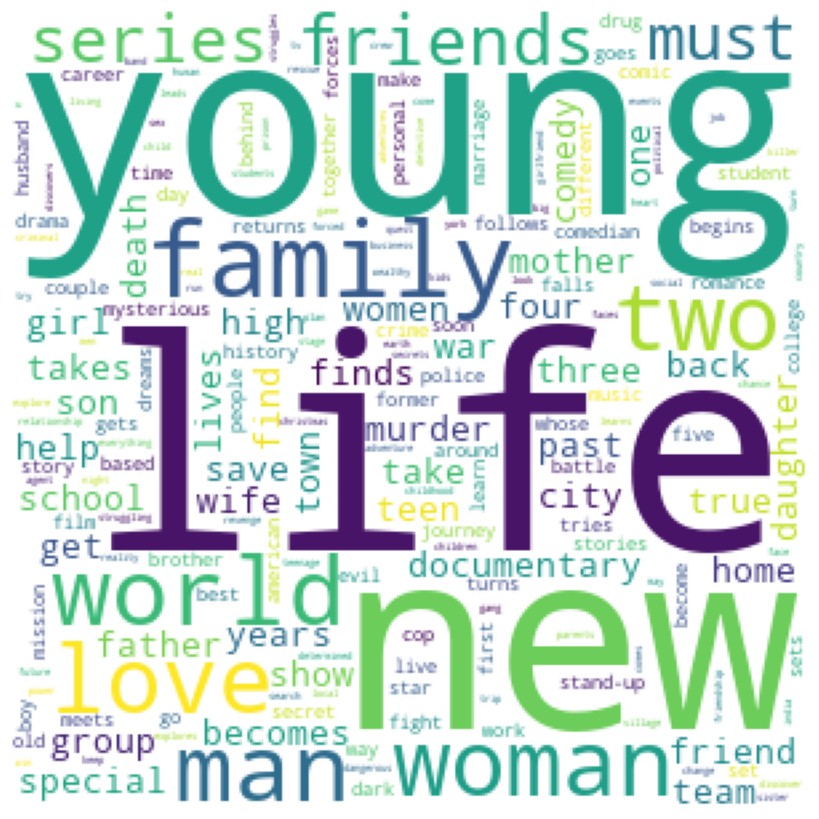

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Now let’s do the TFIDF and compare

In [10]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [11]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
life,707,1776.159801
young,655,1689.173364
new,603,1622.411767
family,550,1516.816832
world,478,1387.867635


# Let’s draw the word cloud

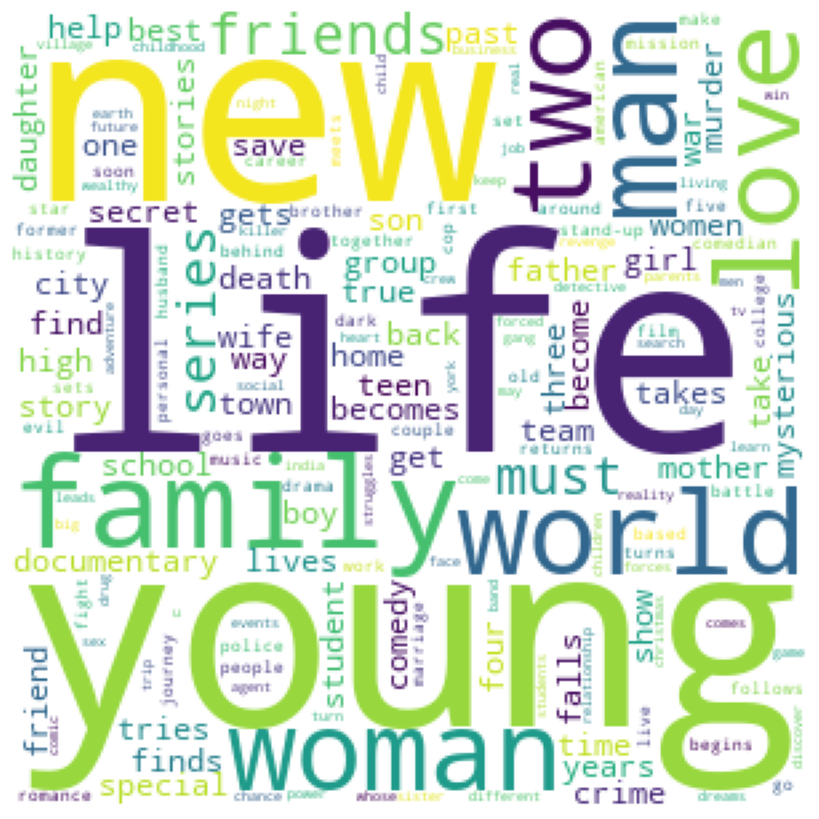

In [12]:
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Function to count the keywords

In [13]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to group by year

In [14]:
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

# Draw!

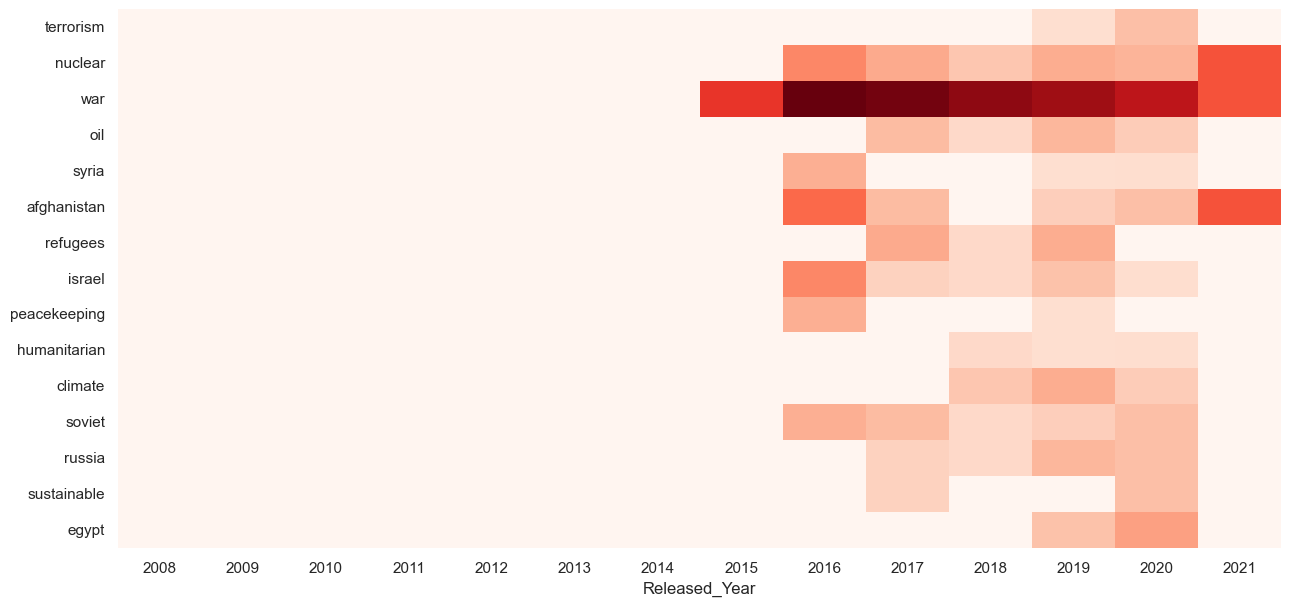

In [15]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt'] 
freq_df = count_keywords_by(df, by='Released_Year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Released_Year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)